<a href="https://colab.research.google.com/github/karma-os/Kaggle_study/blob/main/titanic2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Kernel

1st: Titanic

This is 2nd kernel study of Titanic competition.



# Initial Setting

In [ ]:
#Library Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import os

plt.style.use("fivethirtyeight")
sns.set(font_scale = 2.5) #font_size 지정안하고 이러는게 편하대
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

plt.style.use("seaborn")
sns.set(font_scale = 3.0)


In [ ]:
#Initial Setting for data storage

!mkdir -p /content/drive/MyDrive/Kaggle_kernel/data/titanic
os.chdir("/content/drive/MyDrive/Kaggle_kernel/data/titanic")


In [ ]:
#Dataset Load

INITIAL_RUN=True
FILE_DOWNLOAD_COMPLETE=True

if INITIAL_RUN:
    !mkdir /root/.kaggle
    !cp /content/drive/MyDrive/Kaggle/kaggle.json  /root/.kaggle/kaggle.json   # kaggl.json위치 지정
    !chmod 600 /root/.kaggle/kaggle.json
    !kaggle competitions download -c titanic

mkdir: cannot create directory ‘/root/.kaggle’: File exists
train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


## Part 1. EDA





In [ ]:
data = pd.read_csv("train.csv")

In [ ]:
#Age, Cabin, Embarked has null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

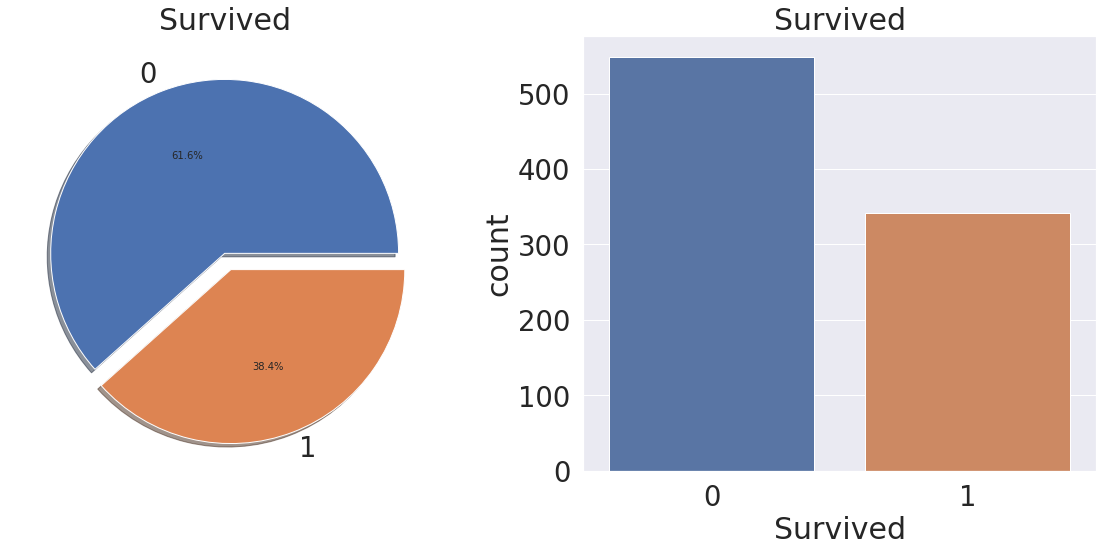

In [ ]:
f, ax = plt.subplots(1,2, figsize= (18,8))

data["Survived"].value_counts().plot.pie(explode = [0,0.1], autopct = "%1.1f%%", ax = ax[0], shadow = True)
ax[0].set_title("Survived")
ax[0].set_ylabel("")

sns.countplot("Survived", data= data, ax = ax[1])

ax[1].set_title("Survived")

plt.show()




## Type of Features

### Categorical Features
여러 개의 category가 있는 것들

ex ) Sex, Embarked

<br></br>

### Ordinal feature
여러 개의 category가 있으나, ordering은 가능.

ex) PClass

<br></br>


### Contionus feature

ex)  Age





#### Analyzing Features

In [ ]:
# Sex -> Categorical Features
data.groupby(["Sex","Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

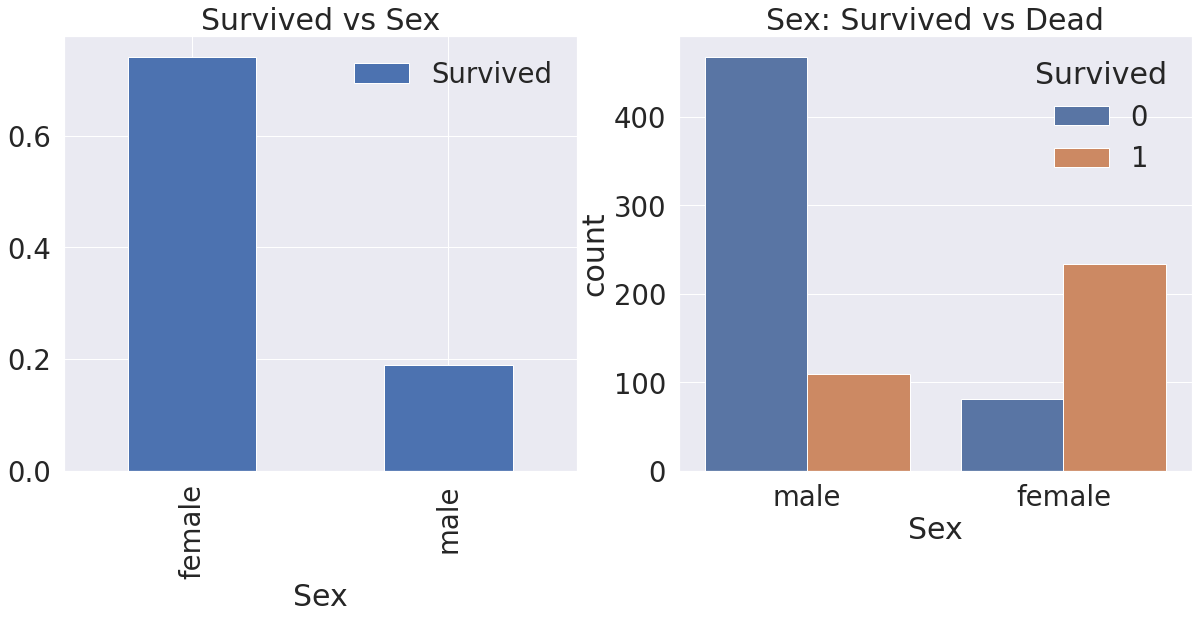

In [ ]:
f, ax = plt.subplots(1,2, figsize= (18,8))

data[["Sex","Survived"]].groupby(["Sex"]).mean().plot.bar(ax = ax[0])
ax[0].set_title("Survived vs Sex")

sns.countplot("Sex", hue = "Survived", data= data, ax = ax[1])

ax[1].set_title("Sex: Survived vs Dead")

plt.show()



#Result: Man number >> Woman Number, Saved ones: man <<Woman

In [ ]:
#Pclass -> Ordinal Feature

pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap = "summer_r")






Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


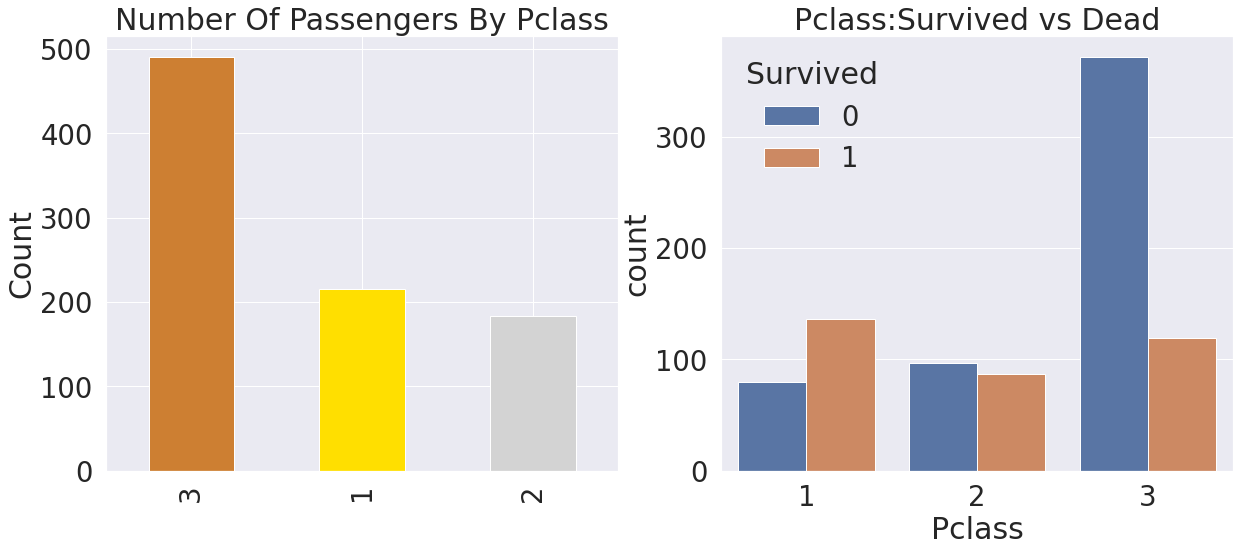

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

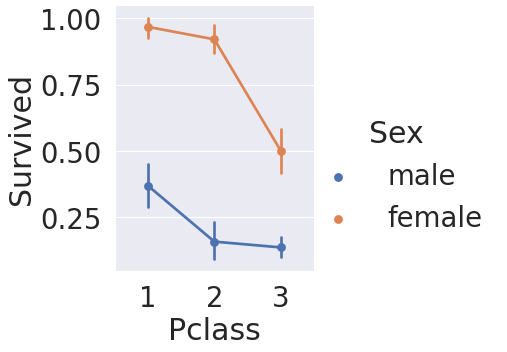

In [ ]:
#CrossTab   
#Factorplot : Easily seperates categorical values


##Analysis Result : Woman were given priority to survive.

sns.factorplot("Pclass", "Survived", hue = "Sex", data= data, figsize= (20,8))
plt.show()

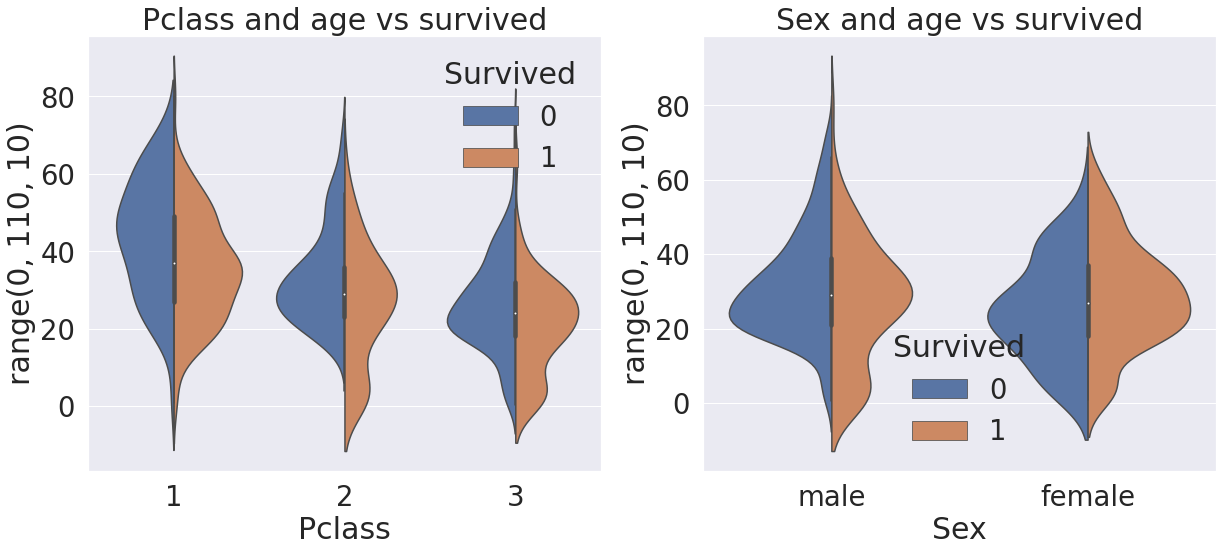

In [ ]:
# Age -> Continous feature


f, ax = plt.subplots(1,2, figsize= (18,8))
sns.violinplot("Pclass", "Age", hue = "Survived", data= data, split = True, ax = ax[0])
ax[0].set_title("Pclass and age vs survived")
ax[0].set_ylabel(range(0,110,10))

sns.violinplot("Sex", "Age", hue= "Survived", data= data, split = True, ax= ax[1])
ax[1].set_title("Sex and age vs survived")
ax[1].set_ylabel(range(0,110,10))

plt.show()



Observations:
1)The number of children increases with Pclass and the survival rate for passenegers below Age 10(i.e children) looks to be good irrespective of the Pclass.

2)Survival chances for Passenegers aged 20-50 from Pclass1 is high and is even better for Women.

3)For males, the survival chances decreases with an increase in age.


라는데 잘 모르겠음

In [ ]:
#Data Change: For nan values in age, we use feature "name"

data["Initial"] = 0

for i in data:
    data["Initial"] = data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations ( string.(??)의 형태)


data["Initial"]



0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object

In [ ]:
old_cols = ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don']
new_cols = ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr']

data["Initial"].replace(old_cols, new_cols, inplace = True)

data["Initial"]


0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886    Other
887     Miss
888     Miss
889       Mr
890       Mr
Name: Initial, Length: 891, dtype: object

In [ ]:
data.groupby("Initial")["Age"].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [ ]:
#Assigning the NaN Values with the Ceil values of the mean ages
# 이렇게 feature를 부여!

data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

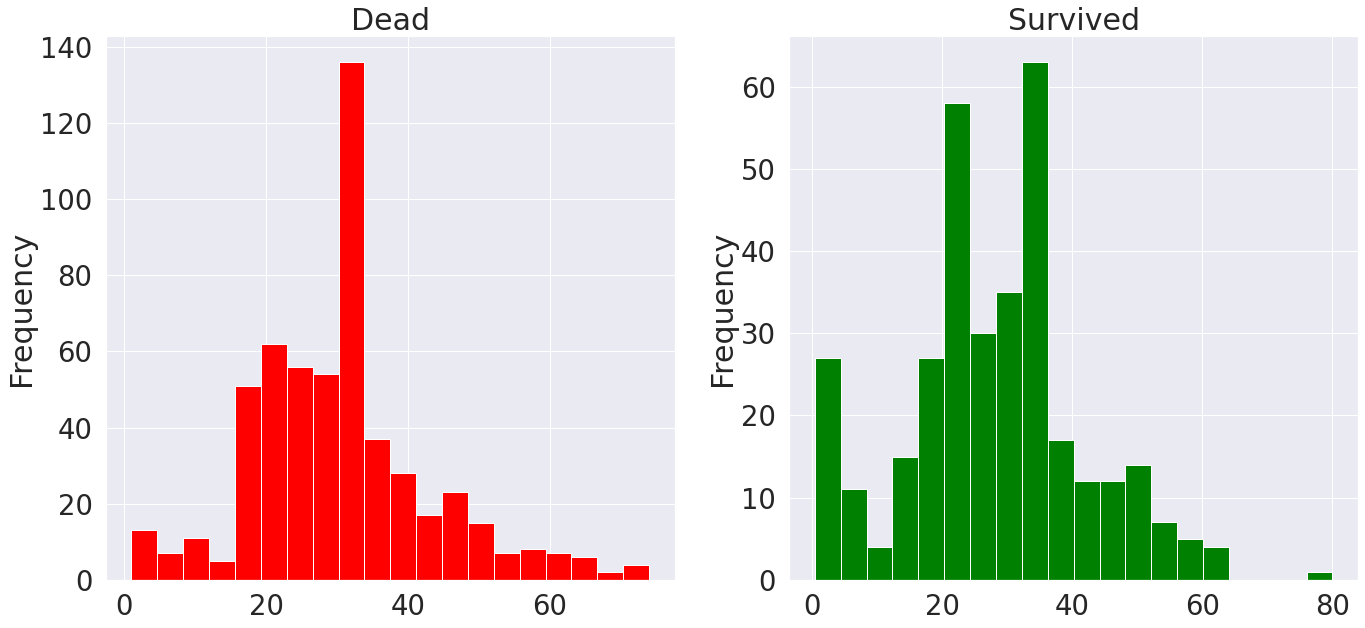

'\nResult:\n\n1) Toddler survived a lot\n\n2) Oldest one was survived\n\n3) Maximum death was among 30-40.\n\n\n'

In [ ]:
f, ax = plt.subplots(1,2, figsize =(20,10))

survived = data[data["Survived"]==1]["Age"]
dead = data[data["Survived"]==0]["Age"]

dead.plot.hist(ax = ax[0], bins = 20, color = "red")
ax[0].set_title("Dead")
survived.plot.hist(ax = ax[1], bins = 20, color = "green")
ax[1].set_title("Survived")

plt.show()

"""
Result:

1) Toddler survived a lot

2) Oldest one was survived

3) Maximum death was among 30-40.


"""


In [ ]:
#Embarked -> Categorical value

pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins = True).style.background_gradient(
    cmap = "summer_r"
)


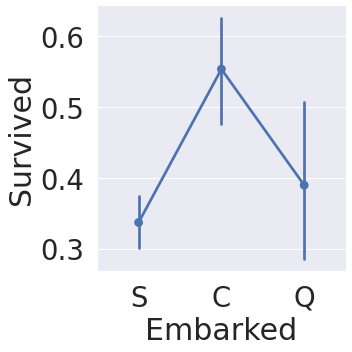

In [ ]:
sns.factorplot("Embarked", "Survived", data = data)


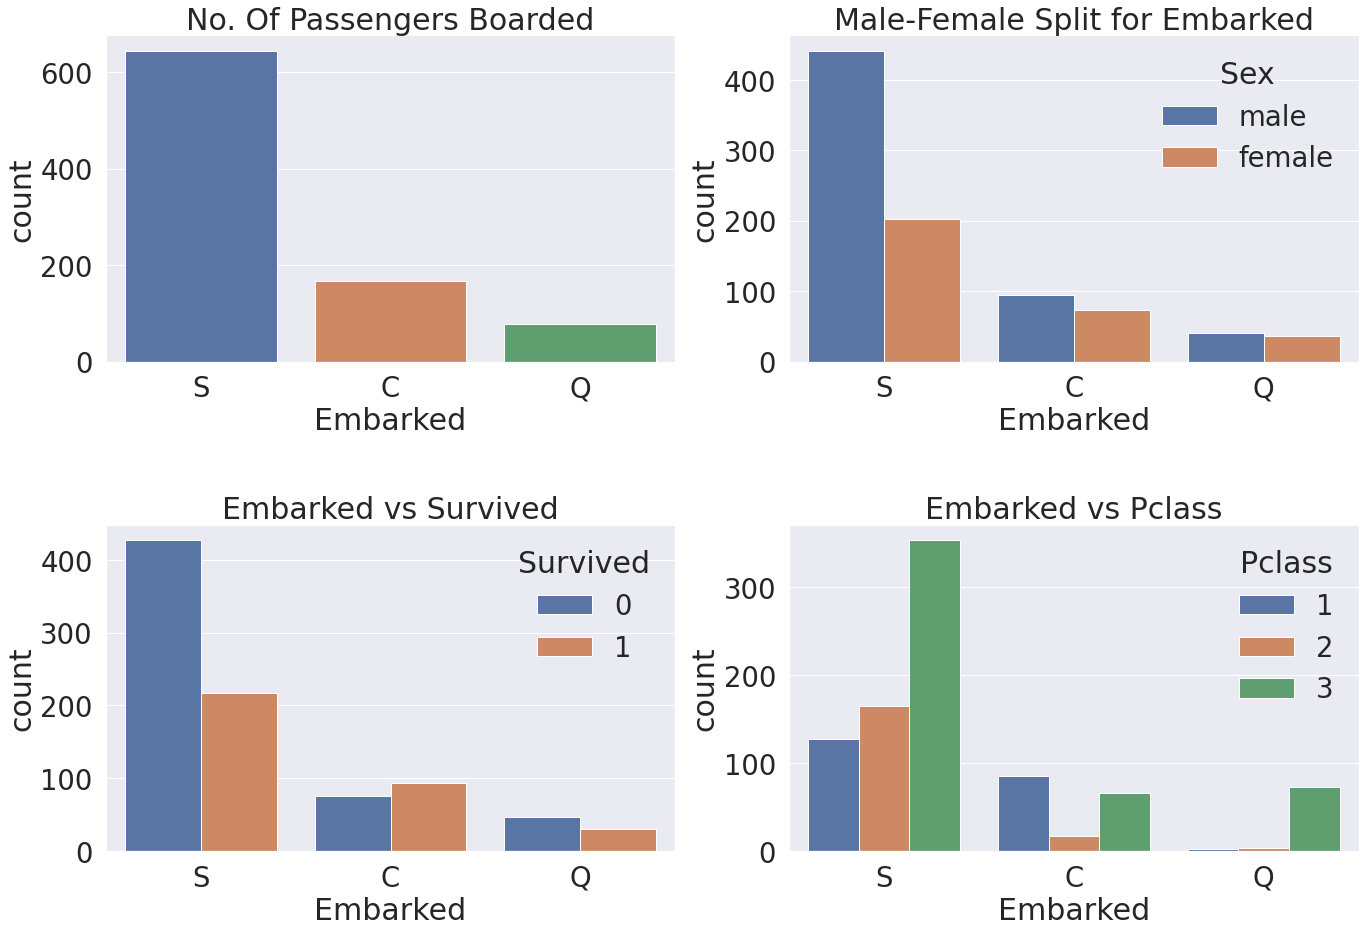

In [ ]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

Observations:


1)Maximum passenegers boarded from S. Majority of them being from Pclass3.

2)The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass1 and Pclass2 Passengers.

3)The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass3 around 81% didn't survive.

4)Port Q had almost 95% of the passengers were from Pclass3.

In [ ]:
data['Embarked'].fillna('S',inplace=True)

In [ ]:
#Sibsp -> Discrete Feature
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


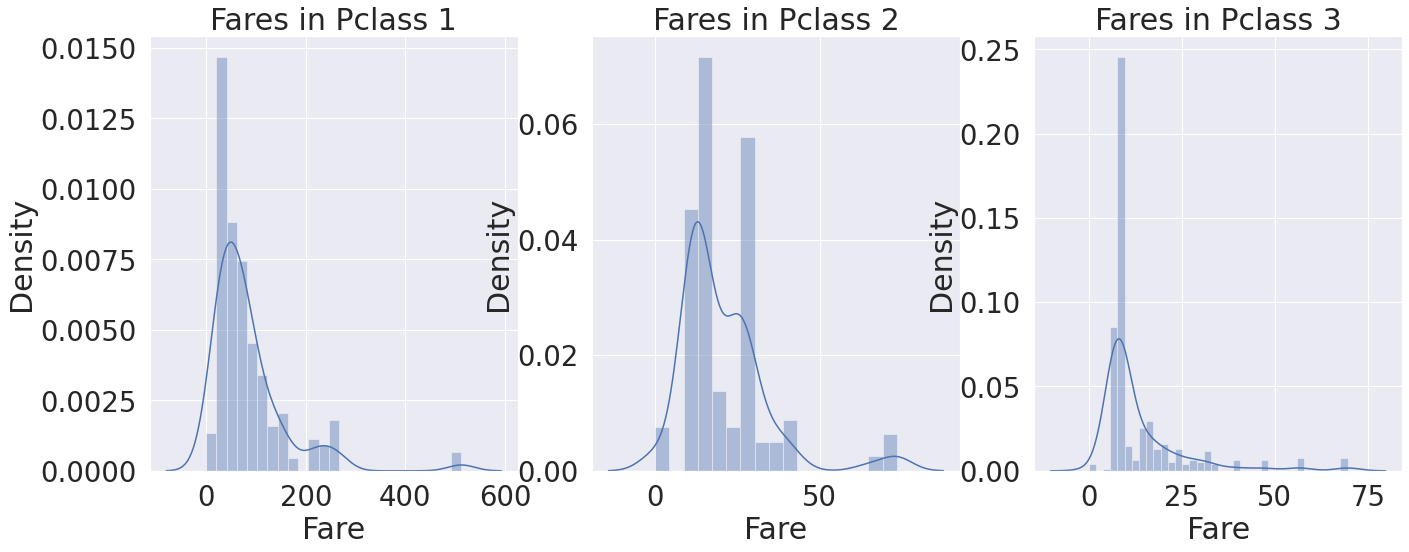

In [ ]:
#Fare -> Continuous Feature
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()



Observations in a Nutshell for all features:
Sex: The chance of survival for women is high as compared to men.

Pclass:There is a visible trend that being a 1st class passenger gives you better chances of survival. The survival rate for Pclass3 is very low. For women, the chance of survival from Pclass1 is almost 1 and is high too for those from Pclass2. Money Wins!!!.

Age: Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

Embarked: This is a very interesting feature. The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S. Passengers at Q were all from Pclass3.

Parch+SibSp: Having 1-2 siblings,spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family travelling with you.

# Correlation between features

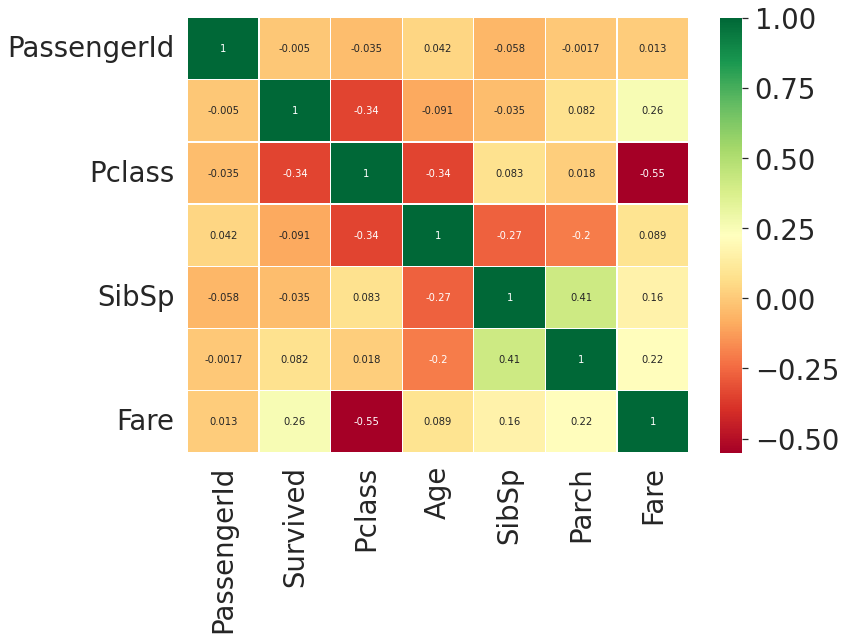

In [ ]:
"""
Heatmap:

High correlation : Multicolinearity (Mostly redundant info.)

So elimination can work.


"""



sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn", linewidths = 0.2)

fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# Feature Engineering

[1] Issue: categorical은 그렇다 쳐도, age는 어떻게 묶나?

- age같은 cont.value들은 Binning이나 Normalization을 이용해야 함.

[2] Family size: Sibsp+Parch

[3] Fare_range = Ordinal value로 만들 것!
(by pd.qcut)

In [ ]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [ ]:
data["Age_band"].value_counts().to_frame()

,Age_band
1,382
2,325
0,104
3,69
4,11


In [ ]:
#Fare_range

data["Fare_Range"] = pd.qcut(data["Fare"], 4)

data.groupby(["Fare_Range"])["Survived"].mean().to_frame()




,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [ ]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

In [ ]:
#Change categorical values into discrete values

data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

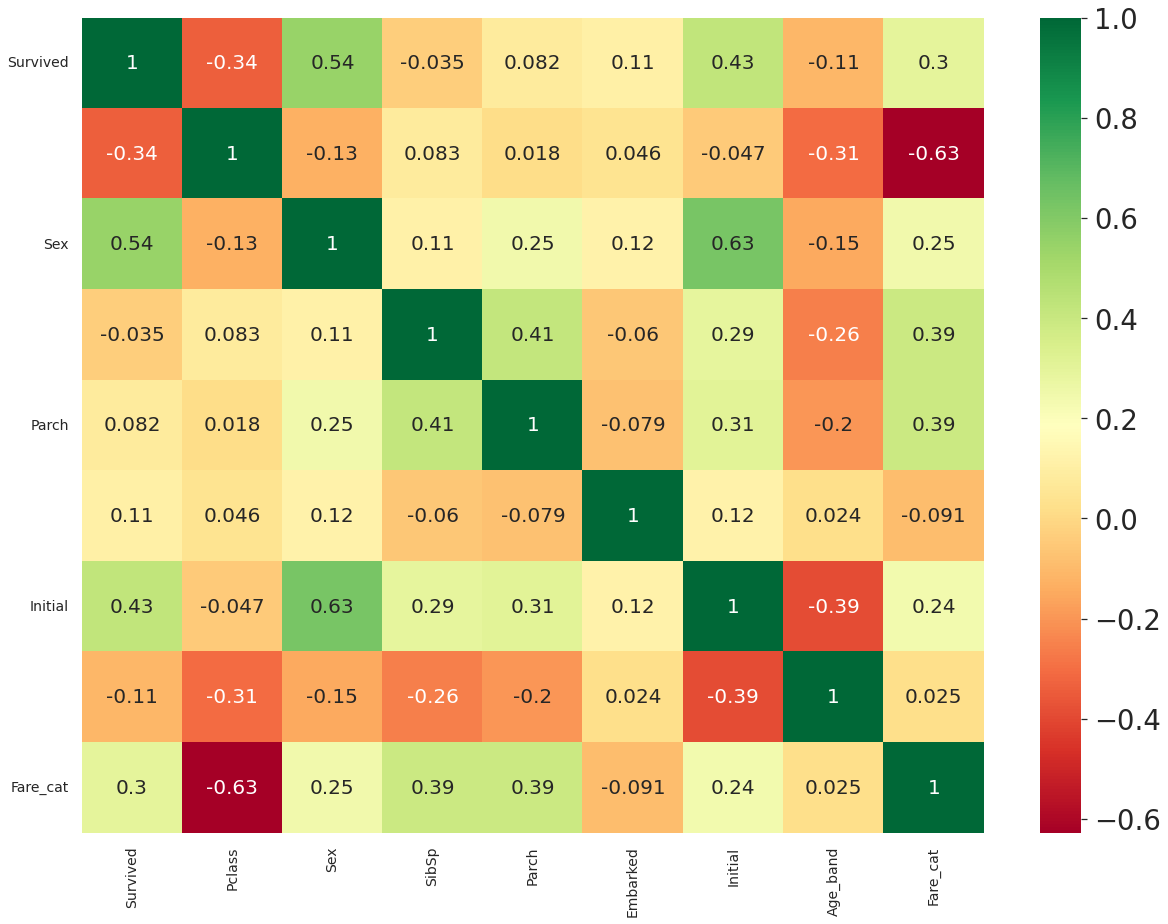

In [ ]:
unnecessary = ["Name", "Age", "Ticket", "Fare", "Cabin", "Fare_Range", "PassengerId"]

data.drop(unnecessary, axis = 1, inplace = True)

sns.heatmap(data.corr(),annot = True, cmap = "RdYlGn", annot_kws = {"size":20})

fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize = 14) ; plt.yticks(fontsize=14)

plt.show()


In [ ]:
data.describe()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Fare_cat
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,0.523008,0.381594,0.361392,0.735129,1.439955,1.505051
std,0.486592,0.836071,0.477990,1.102743,0.806057,0.635673,1.001959,0.842373,1.118148
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
50%,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,1.000000,3.000000,1.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000
max,1.000000,3.000000,1.000000,8.000000,6.000000,2.000000,4.000000,4.000000,3.000000


# Part 3: Predictive Modeling


1) Logistic Regression

2) SVM(Linear, Radial)

3) Random Forest

4) KNN

5) Naive Bayes

6) DT










In [ ]:
#Import all necessary packages

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#Metrics, Utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics


In [ ]:
train, test = train_test_split(data, test_size = 0.3, random_state = 0, stratify = data["Survived"])

train_X = train[train.columns[1:]]  ; train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]  ; test_Y = test[test.columns[:1]]

X = data[data.columns[1:]] ; Y = data["Survived"]




In [ ]:
train_X

,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Fare_cat
231,3,0,0,0,0,0,1,0
836,3,0,0,0,0,0,1,1
639,3,0,1,0,0,0,2,2
389,2,1,0,0,1,2,1,1
597,3,0,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...
131,3,0,0,0,0,0,1,0
490,3,0,1,0,0,0,2,2
838,3,0,0,0,0,0,1,3
48,3,0,2,0,1,0,2,2


##Radial SVM

In [ ]:
model = svm.SVC(kernel = "rbf", C = 1, gamma = 0.1)

model.fit(train_X, train_Y)

prediction1 = model.predict(test_X)

print("Acc for rbf SVM:" , metrics.accuracy_score(prediction1, test_Y))


Acc for rbf SVM: 0.832089552238806


## Linear SVM

In [ ]:
model = svm.SVC(kernel = "linear", C = 0.1, gamma = 0.1)

model.fit(train_X, train_Y)

prediction2 = model.predict(test_X)
print("Acc for linear SVM:" , metrics.accuracy_score(prediction2, test_Y))


Acc for linear SVM: 0.8059701492537313


## Logistic Regression

In [ ]:
model = LogisticRegression()

model.fit(train_X, train_Y)

prediction3 = model.predict(test_X)
print("Acc for logistic regression:" , metrics.accuracy_score(prediction3, test_Y))


Acc for logistic regression: 0.8171641791044776


## Decision Tree

In [ ]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)

prediction4 = model.predict(test_X)
print("Acc for Tree:" , metrics.accuracy_score(prediction4, test_Y))



Acc for Tree: 0.7910447761194029


##KNN

In [ ]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)

prediction5 = model.predict(test_X)
print("Acc for KNN:" , metrics.accuracy_score(prediction5, test_Y))


Acc for KNN: 0.8171641791044776


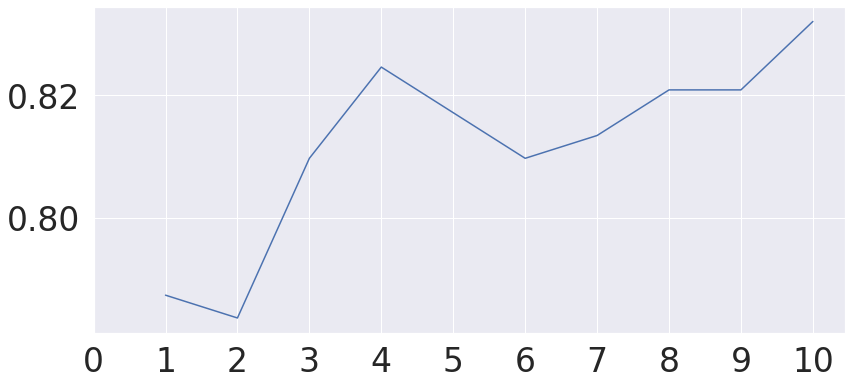

Accuracies for different values of n are: [0.78731343 0.78358209 0.80970149 0.82462687 0.81716418 0.80970149
 0.81343284 0.82089552 0.82089552 0.83208955] with the max value as  0.832089552238806


In [ ]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

#Gaussian NB

In [ ]:
model = GaussianNB()

model.fit(train_X, train_Y)

prediction6 = model.predict(test_X)

print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))



The accuracy of the NaiveBayes is 0.8134328358208955


## Random Forest

In [ ]:
model = RandomForestClassifier(n_estimators=100)

model.fit(train_X, train_Y)

prediction7 = model.predict(test_X)

print("Acc of Random Forest:", metrics.accuracy_score(prediction7, test_Y))


Acc of Random Forest: 0.8246268656716418



# Cross Validation

To address data imbalance or model variation,
we often do kinda multiple validation.

Let's do KFold

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

In [ ]:
kfold = KFold(n_splits = 10, random_state = 22)

xyz= [] ; accuracy = [] ; std = []

clf=["Linear SVM", "Radial SVM", "Logistic Regression",
     "KNN", "Decision Tree", "Naive Bayes", "Random Forest"]
models = [svm.SVC(kernel = "linear"), svm.SVC(kernel = "rbf"), LogisticRegression(),
          KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators = 100)
          ]


for model in models:
    model = model
    cv_result = cross_val_score(model,X,Y, cv = kfold, scoring="accuracy")
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({"CV Mean":xyz, "CV Std":std}, index = clf)
new_models_dataframe2

,CV Mean,CV Std
Linear SVM,0.786729,0.039372
Radial SVM,0.829401,0.036872
Logistic Regression,0.799126,0.025127
KNN,0.814881,0.035150
Decision Tree,0.808115,0.032498
Naive Bayes,0.804719,0.031819
Random Forest,0.815968,0.039461


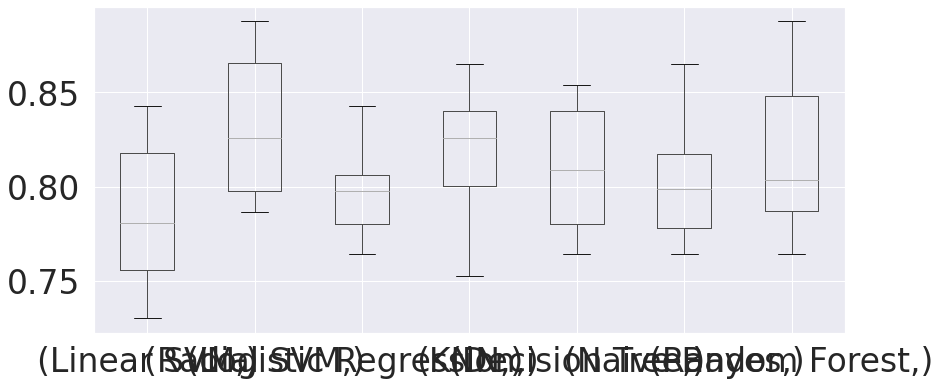

In [ ]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[clf])
box.T.boxplot()

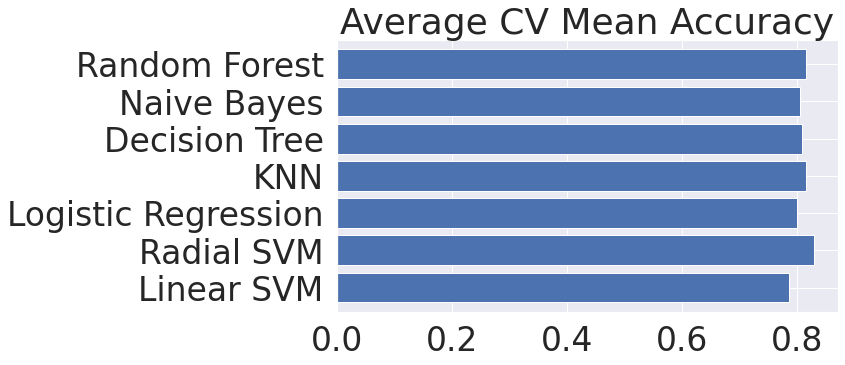

In [ ]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

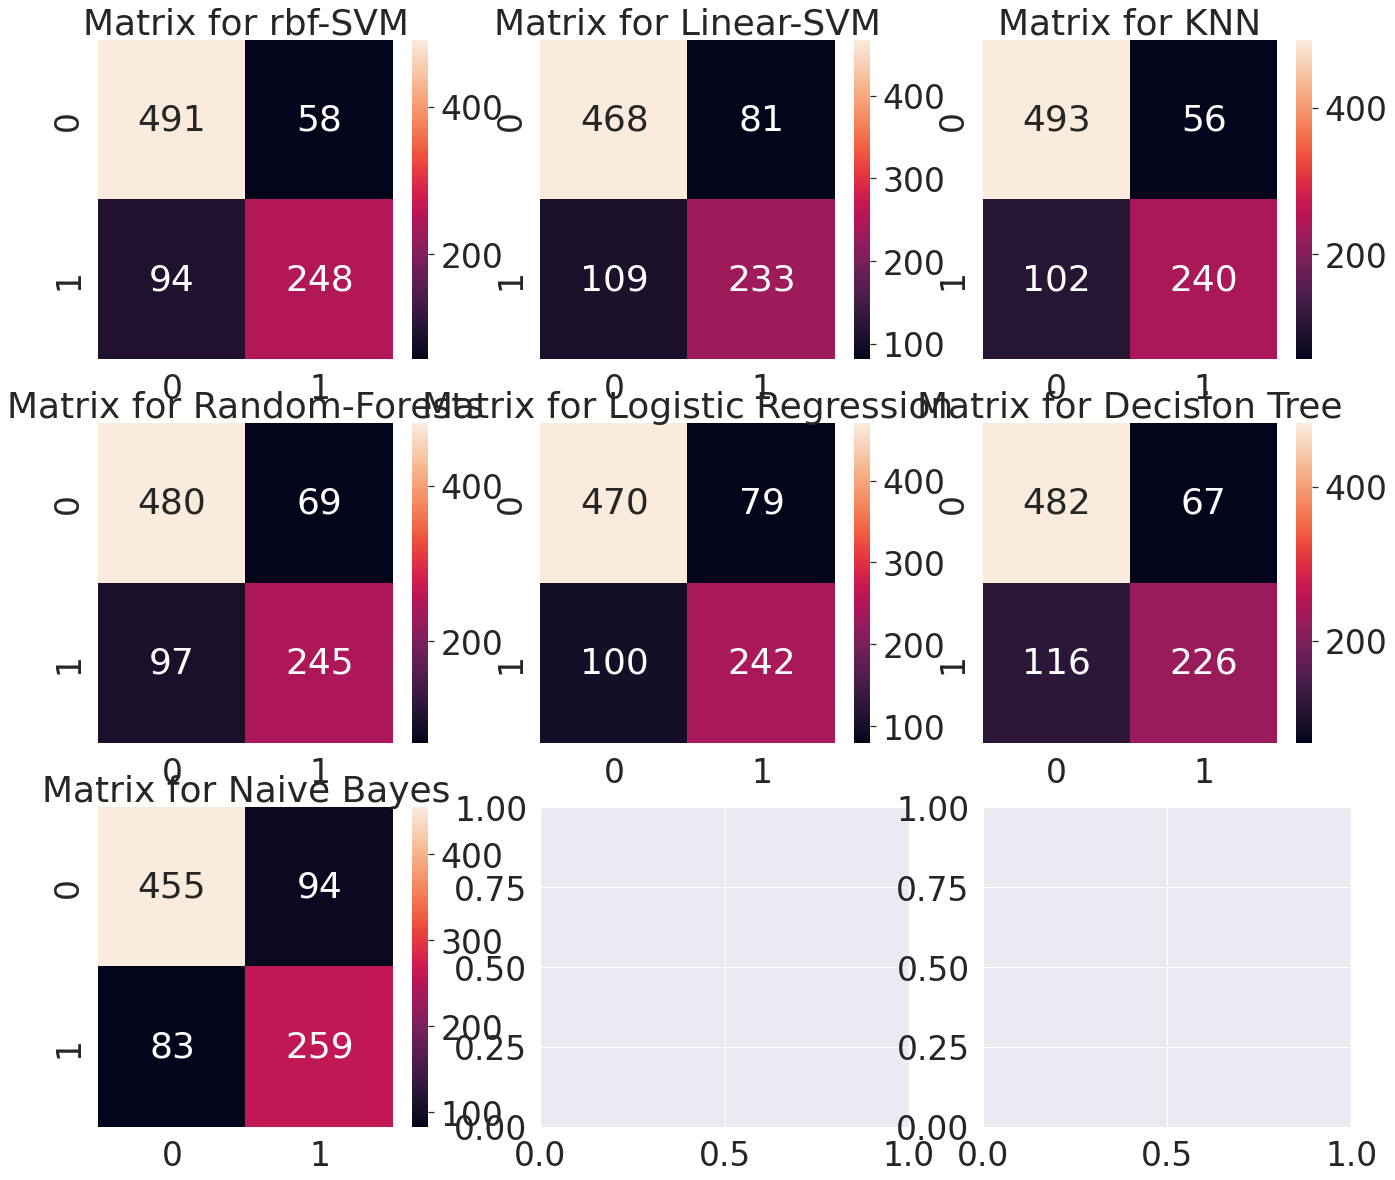

In [ ]:
f,ax=plt.subplots(3,3,figsize=(20,20))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

# HyOpt

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV


#SVM
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']

hyper = {"kernel":kernel, "C":C, "gamma":gamma}
gd = GridSearchCV(estimator = svm.SVC(), param_grid = hyper, verbose = True)
gd.fit(X,Y)

print(gd.best_score_)
print(gd.best_estimator_)





Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8316238779737619
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   19.6s finished


In [ ]:
#Random Forest

n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   38.3s finished


0.8137028435126483
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


# Ensembling

There are many ways to perform ensembling


1) Voting Classifier


2) Bagging

3) Boosting





### Voting
-Gives avg based on the prediction of all submodels

-Submodels are all of diff types

In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)

print("=====================================")

print("Acc of ensemble model:", ensemble_lin_rbf.score(test_X, test_Y))

cross = cross_val_score(ensemble_lin_rbf, X,Y, cv = 10, scoring= "accuracy")

print("CV score:", cross.mean())






Acc of ensemble model: 0.8171641791044776
CV score: 0.8271285892634207


### Bagging

Bagging works by applying similar clfs on small partitions of data.

Due to avg, variance reduces.



In [ ]:
from sklearn.ensemble import BaggingClassifier

model1=BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors = 3), random_state = 0, n_estimators =700)

model1.fit(train_X, train_Y)

prediction1 = model1.predict(test_X)

print("Acc of bagged KNN:", metrics.accuracy_score(prediction1, test_Y))
result1 = cross_val_score(model1, X,Y,cv=10, scoring= "accuracy")

print("CV for bagged KNN:", result1.mean())

print("="* 50)

model2= BaggingClassifier(base_estimator = DecisionTreeClassifier(), random_state =0, n_estimators =100)
model2.fit(train_X, train_Y)

prediction2 = model2.predict(test_X)

print("Acc of bagged DT:", metrics.accuracy_score(prediction2, test_Y))

result2 = cross_val_score(model2, X,Y,cv = 10, scoring= 'accuracy')

print("CV for bagged DT:", result2.mean())











Acc of bagged KNN: 0.835820895522388
CV for bagged KNN: 0.8171535580524345
Acc of bagged DT: 0.8134328358208955
CV for bagged DT: 0.8148813982521848


### Boosting
Ensemble method which uses sequential learning clf
Step by step enhancement.


Model first trainedon compelte dataset
-> Model focus more on wrongly predicted ones



In [ ]:
# Adabost : Weak Learner: DT, 그런데 base_estimator 바꾸면 돼
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 200, random_state = 0, learning_rate = 0.1)
result = cross_val_score(ada, X,Y, cv = 10, scoring="accuracy")

print("CV score of Adaboost:",result.mean())




CV score of Adaboost: 0.8260424469413234


In [ ]:
#Stochastic GB : Weak learner, too.

from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators = 500, random_state = 0, learning_rate =0.1)
result = cross_val_score(grad, X,Y, cv = 10, scoring="accuracy")

print("CV score of GB:",result.mean())



CV score of GB: 0.8103870162297128


In [ ]:
#XGBoost
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators = 900, learning_rate = 0.1)
result = cross_val_score(xgboost, X,Y, cv = 10, scoring="accuracy")
print("CV score for XGboost:", result.mean())





CV score for XGboost: 0.8115355805243445


In [ ]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  9.6min finished


0.8249136902893728
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=500, random_state=None)
